### Script to train and test the naive bayes classifier for daily, weekly and monthly data agains news sentiment data

In [10]:
import pandas as pd
# dont print 'FutureWarning' warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load and preprocess data
aapl_daily = pd.read_csv('data/AAPL_daily.csv', index_col=0, parse_dates=True)
aapl_weekly = pd.read_csv('data/AAPL_weekly.csv', index_col=0, parse_dates=True)
aapl_monthly = pd.read_csv('data/AAPL_monthly.csv', index_col=0, parse_dates=True)
aapl_sentiment = pd.read_csv('data/aapl_sentiment.csv', index_col=0, parse_dates=True)

# change column names to lowercase and switch spaces with underscores
aapl_daily.columns = aapl_daily.columns.str.lower().str.replace(' ', '_')
aapl_weekly.columns = aapl_weekly.columns.str.lower().str.replace(' ', '_')
aapl_monthly.columns = aapl_monthly.columns.str.lower().str.replace(' ', '_')
aapl_sentiment.columns = aapl_sentiment.columns.str.lower().str.replace(' ', '_')

# rename 'time_published' to 'date' in aapl_sentiment
aapl_sentiment = aapl_sentiment.rename(columns={'time_published': 'date'})
# change 'date' format to 'YYYY-MM-DD' in aapl_sentiment
aapl_sentiment['date'] = pd.to_datetime(aapl_sentiment['date']).dt.strftime('%Y-%m-%d')
# transform 'date' column to datetime type in aapl_sentiment
aapl_sentiment['date'] = pd.to_datetime(aapl_sentiment['date'])


# match the value of the aapl_sentiment['date'] columns with the index of the other dataframes and based on that merge the 'overall_sentiment_score' column to the other dataframes
aapl_daily = aapl_daily.merge(aapl_sentiment[['date', 'overall_sentiment_score']], left_index=True, right_on='date')
aapl_weekly = aapl_weekly.merge(aapl_sentiment[['date', 'overall_sentiment_score']], left_index=True, right_on='date')
aapl_monthly = aapl_monthly.merge(aapl_sentiment[['date', 'overall_sentiment_score']], left_index=True, right_on='date')

# move the range of the sentiment score to values that are all positive
aapl_daily['overall_sentiment_score'] = aapl_daily['overall_sentiment_score'] + 0.5
aapl_weekly['overall_sentiment_score'] = aapl_weekly['overall_sentiment_score'] + 0.5
aapl_monthly['overall_sentiment_score'] = aapl_monthly['overall_sentiment_score'] + 0.5


In [11]:
# # Create labels (1 for Up, 0 for Down)
# # Create a new column in each dataframe called 'label'
aapl_daily['label'] = aapl_daily['close'].shift(-1) > aapl_daily['close']
aapl_weekly['label'] = aapl_weekly['close'].shift(-1) > aapl_weekly['close']
aapl_monthly['label'] = aapl_monthly['close'].shift(-1) > aapl_monthly['close']



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# split the dataframes into X and y
X_daily = aapl_daily.drop(columns=['label', 'date'])
y_daily = aapl_daily['label']

X_weekly = aapl_weekly.drop(columns=['label', 'date'])
y_weekly = aapl_weekly['label']

X_monthly = aapl_monthly.drop(columns=['label', 'date'])
y_monthly = aapl_monthly['label']

# split the dataframes into train and test sets
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.2, random_state=42)
X_train_weekly, X_test_weekly, y_train_weekly, y_test_weekly = train_test_split(X_weekly, y_weekly, test_size=0.2, random_state=42)
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly, test_size=0.2, random_state=42)

In [13]:
# create and train the naive bayes model
clf_daily = MultinomialNB()
clf_weekly = MultinomialNB()
clf_monthly = MultinomialNB()

clf_daily.fit(X_train_daily, y_train_daily)
clf_weekly.fit(X_train_weekly, y_train_weekly)
clf_monthly.fit(X_train_monthly, y_train_monthly)

MultinomialNB()

In [14]:
# make predictions
pred_daily = clf_daily.predict(X_test_daily)
pred_weekly = clf_weekly.predict(X_test_weekly)
pred_monthly = clf_monthly.predict(X_test_monthly)

In [15]:
# print accuracy score and classification report
print('Daily Accuracy Score: ', accuracy_score(y_test_daily, pred_daily))
print('Daily Classification Report: \n', classification_report(y_test_daily, pred_daily))

print('Weekly Accuracy Score: ', accuracy_score(y_test_weekly, pred_weekly))
print('Weekly Classification Report: \n', classification_report(y_test_weekly, pred_weekly))

print('Monthly Accuracy Score: ', accuracy_score(y_test_monthly, pred_monthly))
print('Monthly Classification Report: \n', classification_report(y_test_monthly, pred_monthly))

Daily Accuracy Score:  0.6153846153846154
Daily Classification Report: 
               precision    recall  f1-score   support

       False       1.00      0.61      0.76       116
        True       0.02      1.00      0.04         1

    accuracy                           0.62       117
   macro avg       0.51      0.81      0.40       117
weighted avg       0.99      0.62      0.75       117

Weekly Accuracy Score:  0.36666666666666664
Weekly Classification Report: 
               precision    recall  f1-score   support

       False       1.00      0.37      0.54        30
        True       0.00      0.00      0.00         0

    accuracy                           0.37        30
   macro avg       0.50      0.18      0.27        30
weighted avg       1.00      0.37      0.54        30

Monthly Accuracy Score:  1.0
Monthly Classification Report: 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         5

    accuracy             

c:\Users\elmat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elmat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elmat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [16]:
# enclose the code in a function
def naive_bayes_classifier(data, labels):
    # split the dataframes into X and y
    X = data.drop(columns=['label', 'date'])
    y = data['label']

    # split the dataframes into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create and train the naive bayes model
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    return clf, X_test, y_test

# create a function to make predictions
def predict(clf, X_test, y_test, stock):
    # make predictions
    pred = clf.predict(X_test)

    # print accuracy score and classification report
    return pred, accuracy_score(y_test, pred), classification_report(y_test, pred)

# create a function to preprocess the data
def preprocess_data(data, sentiment):
    # change column names to lowercase and switch spaces with underscores
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    sentiment.columns = sentiment.columns.str.lower().str.replace(' ', '_')

    # rename 'time_published' to 'date' in aapl_sentiment
    sentiment = sentiment.rename(columns={'time_published': 'date'})
    # change 'date' format to 'YYYY-MM-DD' in aapl_sentiment
    sentiment['date'] = pd.to_datetime(sentiment['date']).dt.strftime('%Y-%m-%d')
    # transform 'date' column to datetime type in aapl_sentiment
    sentiment['date'] = pd.to_datetime(sentiment['date'])

    # match the value of the aapl_sentiment['date'] columns with the index of the other dataframes and based on that merge the 'overall_sentiment_score' column to the other dataframes
    data = data.merge(sentiment[['date', 'overall_sentiment_score']], left_index=True, right_on='date')

    # move the range of the sentiment score to values that are all positive
    data['overall_sentiment_score'] = data['overall_sentiment_score'] + 0.5

    # Create labels (1 for Up, 0 for Down)
    # Create a new column in each dataframe called 'label'
    data['label'] = data['close'].shift(-1) > data['close']

    return data

In [17]:
# retrieve data from the csv for aapl, nvda, jnj, xom and jpm
aapl_daily = pd.read_csv('data/AAPL_daily.csv', index_col=0, parse_dates=True)
aapl_weekly = pd.read_csv('data/AAPL_weekly.csv', index_col=0, parse_dates=True)
aapl_monthly = pd.read_csv('data/AAPL_monthly.csv', index_col=0, parse_dates=True)

nvda_daily = pd.read_csv('data/NVDA_daily.csv', index_col=0, parse_dates=True)
nvda_weekly = pd.read_csv('data/NVDA_weekly.csv', index_col=0, parse_dates=True)
nvda_monthly = pd.read_csv('data/NVDA_monthly.csv', index_col=0, parse_dates=True)

jnj_daily = pd.read_csv('data/JNJ_daily.csv', index_col=0, parse_dates=True)
jnj_weekly = pd.read_csv('data/JNJ_weekly.csv', index_col=0, parse_dates=True)
jnj_monthly = pd.read_csv('data/JNJ_monthly.csv', index_col=0, parse_dates=True)

xom_daily = pd.read_csv('data/XOM_daily.csv', index_col=0, parse_dates=True)
xom_weekly = pd.read_csv('data/XOM_weekly.csv', index_col=0, parse_dates=True)
xom_monthly = pd.read_csv('data/XOM_monthly.csv', index_col=0, parse_dates=True)

jpm_daily = pd.read_csv('data/JPM_daily.csv', index_col=0, parse_dates=True)
jpm_weekly = pd.read_csv('data/JPM_weekly.csv', index_col=0, parse_dates=True)
jpm_monthly = pd.read_csv('data/JPM_monthly.csv', index_col=0, parse_dates=True)

# retrieve sentiment data from the csv for aapl, nvda, jnj, xom and jpm
aapl_sentiment = pd.read_csv('data/aapl_sentiment.csv', index_col=0, parse_dates=True)
nvda_sentiment = pd.read_csv('data/nvda_sentiment.csv', index_col=0, parse_dates=True)
jnj_sentiment = pd.read_csv('data/jnj_sentiment.csv', index_col=0, parse_dates=True)
xom_sentiment = pd.read_csv('data/xom_sentiment.csv', index_col=0, parse_dates=True)
jpm_sentiment = pd.read_csv('data/jpm_sentiment.csv', index_col=0, parse_dates=True)

# preprocess the data
aapl_daily = preprocess_data(aapl_daily, aapl_sentiment)
aapl_weekly = preprocess_data(aapl_weekly, aapl_sentiment)
aapl_monthly = preprocess_data(aapl_monthly, aapl_sentiment)

nvda_daily = preprocess_data(nvda_daily, nvda_sentiment)
nvda_weekly = preprocess_data(nvda_weekly, nvda_sentiment)
nvda_monthly = preprocess_data(nvda_monthly, nvda_sentiment)

jnj_daily = preprocess_data(jnj_daily, jnj_sentiment)
jnj_weekly = preprocess_data(jnj_weekly, jnj_sentiment)
jnj_monthly = preprocess_data(jnj_monthly, jnj_sentiment)

xom_daily = preprocess_data(xom_daily, xom_sentiment)
xom_weekly = preprocess_data(xom_weekly, xom_sentiment)
xom_monthly = preprocess_data(xom_monthly, xom_sentiment)

jpm_daily = preprocess_data(jpm_daily, jpm_sentiment)
jpm_weekly = preprocess_data(jpm_weekly, jpm_sentiment)
jpm_monthly = preprocess_data(jpm_monthly, jpm_sentiment)

# create a dictionary to store the dataframes
stocks = {
    'aapl': {
        'daily': aapl_daily,
        'weekly': aapl_weekly,
        'monthly': aapl_monthly
    },
    'nvda': {
        'daily': nvda_daily,
        'weekly': nvda_weekly,
        'monthly': nvda_monthly
    },
    'jnj': {
        'daily': jnj_daily,
        'weekly': jnj_weekly,
        'monthly': jnj_monthly
    },
    'xom': {
        'daily': xom_daily,
        'weekly': xom_weekly,
        'monthly': xom_monthly
    },
    'jpm': {
        'daily': jpm_daily,
        'weekly': jpm_weekly,
        'monthly': jpm_monthly
    }
}

# create a dictionary to store the models
models = {}

# create a dictionary to store the predictions
predictions = {}

# train the models and make predictions
for stock, data in stocks.items():
    for timeframe, df in data.items():
        clf, X_test, y_test = naive_bayes_classifier(df, df['label'])
        models[f'{stock}_{timeframe}'] = clf
        predictions[f'{stock}_{timeframe}'] = predict(clf, X_test, y_test, stock)

# create a function to make predictions for a specific stock and sentiment
def predict_stock(stock, timeframe, sentiment):
    clf = models[f'{stock}_{timeframe}']
    X_test = sentiment.drop(columns=['label', 'date'])
    y_test = sentiment['label']
    predict(clf, X_test, y_test)




c:\Users\elmat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elmat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elmat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

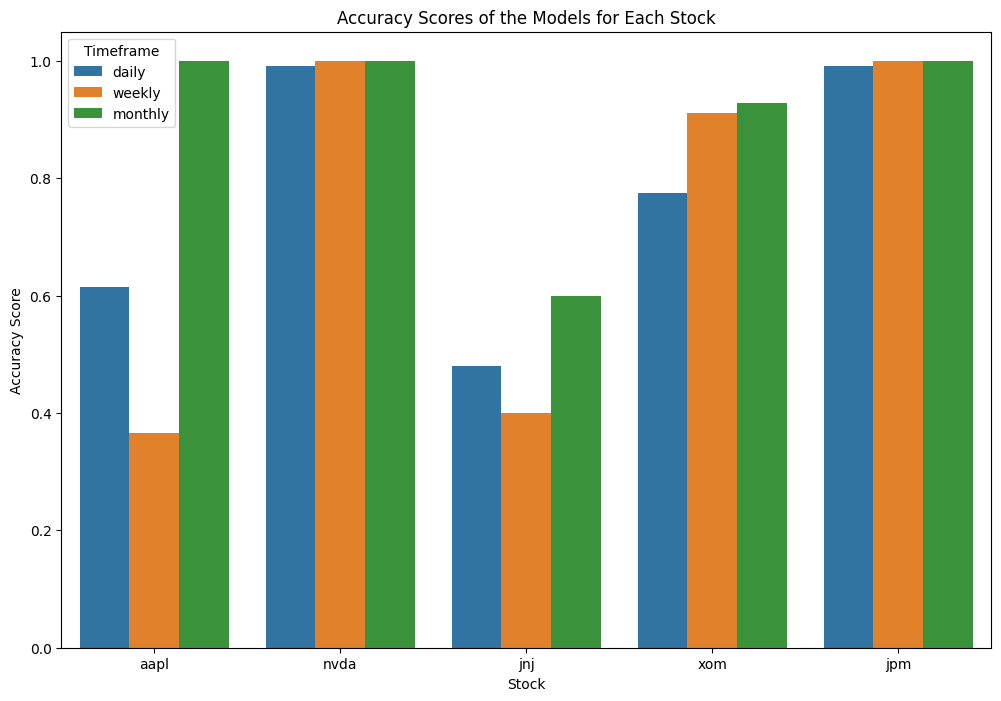

In [18]:
# create a table to compare the accuracy scores of the models for each stock
accuracy_scores = pd.DataFrame(columns=['Stock', 'Timeframe', 'Accuracy Score'])
for stock, data in stocks.items():
    for timeframe, df in data.items():
        accuracy_scores = accuracy_scores.append({'Stock': stock, 'Timeframe': timeframe, 'Accuracy Score': predictions[f'{stock}_{timeframe}'][1]}, ignore_index=True)


import matplotlib.pyplot as plt
import seaborn as sns
# create a barplot to compare the accuracy scores of the models for each stock
plt.figure(figsize=(12, 8))
sns.barplot(x='Stock', y='Accuracy Score', hue='Timeframe', data=accuracy_scores)
plt.title('Accuracy Scores of the Models for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Accuracy Score')
plt.show()

# create a table to compare the classification reports of the models for each stock
classification_reports = pd.DataFrame(columns=['Stock', 'Timeframe', 'Classification Report'])
for stock, data in stocks.items():
    for timeframe, df in data.items():
        classification_reports = classification_reports.append({'Stock': stock, 'Timeframe': timeframe, 'Classification Report': predictions[f'{stock}_{timeframe}'][2]}, ignore_index=True)


# create a table where we compare the accuracy of each model for each stock
accuracy_scores = pd.DataFrame(columns=['Stock', 'Timeframe', 'Accuracy Score'])
for stock, data in stocks.items():
    for timeframe, df in data.items():
        accuracy_scores = accuracy_scores.append({'Stock': stock, 'Timeframe': timeframe, 'Accuracy Score': predictions[f'{stock}_{timeframe}'][1]}, ignore_index=True)





